In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 
from datetime import datetime
from sklearn.neighbors import NearestNeighbors, KNeighborsRegressor

In [3]:
ls


 Volume in drive C is Windows
 Volume Serial Number is EA1C-322F

 Directory of C:\Users\Ujjwa\OneDrive\Desktop\ML Project\walmart\KNN

25-06-2022  13:37    <DIR>          .
25-06-2022  13:04    <DIR>          ..
25-06-2022  13:13    <DIR>          .ipynb_checkpoints
25-06-2022  13:12           527,540 anomaly-detection.ipynb
25-06-2022  13:35             1,054 Base Line KNN.ipynb
25-06-2022  13:12           206,128 Final_Pre-processing.ipynb
25-06-2022  13:12           262,079 Final_Pre-processing_Returns.ipynb
25-06-2022  13:37           773,303 LSTM Auto Encoder.ipynb
05-05-2022  12:54        38,617,886 walmart.csv
               6 File(s)     40,387,990 bytes
               3 Dir(s)  137,258,926,080 bytes free


In [35]:
data = pd.read_csv('walmart_final.csv')
data.head()

,Date,Store,IsHoliday,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,Total_Markdown,...,93.0,94.0,95.0,96.0,97.0,98.0,99.0,Type_1,Type_2,Type_3
0,2010-02-05,1,0,0.122377,0.122844,0.041637,0.8405,0.405118,0.630267,0.0,...,0,0,0,0,0,0,0,0,0,1
1,2010-02-05,1,0,0.057628,0.122844,0.041637,0.8405,0.405118,0.630267,0.0,...,0,0,0,0,0,0,0,0,0,1
2,2010-02-05,1,0,0.064927,0.122844,0.041637,0.8405,0.405118,0.630267,0.0,...,0,0,0,0,0,0,0,0,0,1
3,2010-02-05,1,0,0.000184,0.122844,0.041637,0.8405,0.405118,0.630267,0.0,...,0,0,0,0,0,0,0,0,0,1
4,2010-02-05,1,0,0.005329,0.122844,0.041637,0.8405,0.405118,0.630267,0.0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
data["Date"] = pd.to_datetime(data["Date"]) # convert to datetime
data['week'] =data['Date'].dt.week
data['month'] =data['Date'].dt.month 

In [37]:
data["Date"] = pd.to_datetime(data["Date"])
data = data.set_index("Date")

In [41]:
df = data.copy()
df = df.drop('Store' , axis = 1)

In [42]:
df

,IsHoliday,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,Total_Markdown,1.0,2.0,...,95.0,96.0,97.0,98.0,99.0,Type_1,Type_2,Type_3,week,month
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0,0.122377,0.122844,0.041637,0.840500,0.405118,0.630267,0.000000,1,0,...,0,0,0,0,0,0,0,1,5,2
2010-02-05,0,0.057628,0.122844,0.041637,0.840500,0.405118,0.630267,0.000000,0,0,...,0,0,0,0,0,0,0,1,5,2
2010-02-05,0,0.064927,0.122844,0.041637,0.840500,0.405118,0.630267,0.000000,0,0,...,0,0,0,0,0,0,0,1,5,2
2010-02-05,0,0.000184,0.122844,0.041637,0.840500,0.405118,0.630267,0.000000,0,0,...,0,0,0,0,0,0,0,1,5,2
2010-02-05,0,0.005329,0.122844,0.041637,0.840500,0.405118,0.630267,0.000000,0,0,...,0,0,0,0,0,0,0,1,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,0,0.108989,0.590431,0.865399,0.654796,0.458884,0.451136,0.062609,0,0,...,0,0,0,0,0,0,1,0,43,10
2012-10-26,0,0.011048,0.590431,0.865399,0.654796,0.458884,0.451136,0.062609,0,0,...,0,0,0,0,0,0,1,0,43,10
2012-10-26,0,0.017160,0.590431,0.865399,0.654796,0.458884,0.451136,0.062609,0,0,...,0,0,0,0,0,0,1,0,43,10


In [45]:
X = df.values
X.shape

(421570, 94)

In [46]:
# instantiate model
nbrs = NearestNeighbors(n_neighbors = 11)
# fit model
nbrs.fit(X)

NearestNeighbors(n_neighbors=11)

<AxesSubplot:title={'center':'Distances Distribution'}, ylabel='Density'>

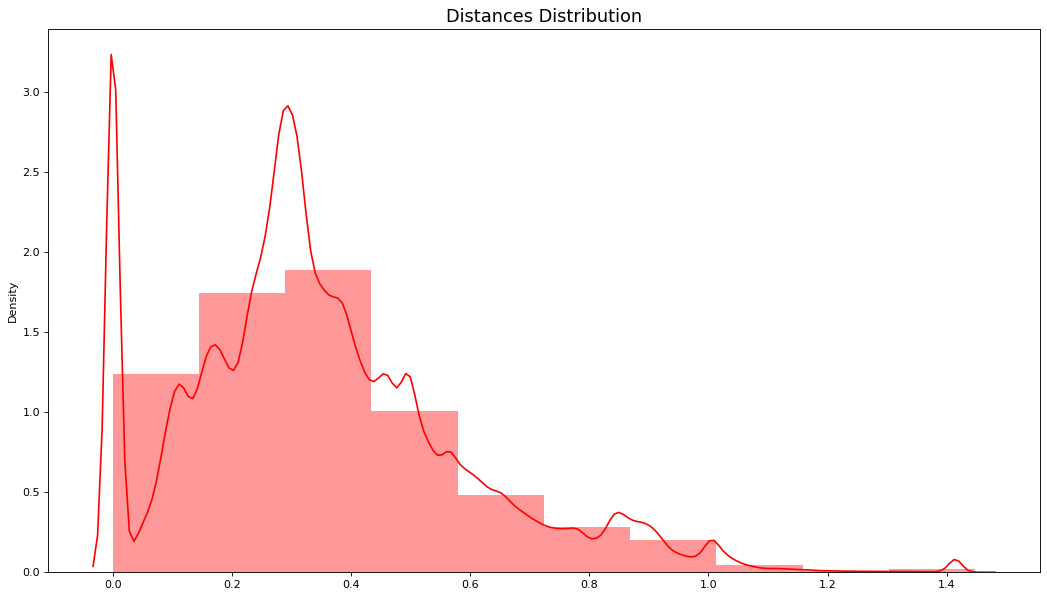

In [49]:
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(X)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Distances Distribution', fontsize=16)
sns.distplot(distances, bins = 10, kde= True, color = 'red')